- https://medium.com/@robdelacruz/frank-rosenblatts-perceptron-19fcce9d627f
- https://medium.com/data-science/classification-with-rosenblatts-perceptron-e7f49e3af562

In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand(1)

        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
    
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self._activation(weighted_sum)
    
    def _activation(self, z):
        return 1 if z >= 0 else -1

Test Accuracy: 100.00%


Text(0, 0.5, 'Feature 1')

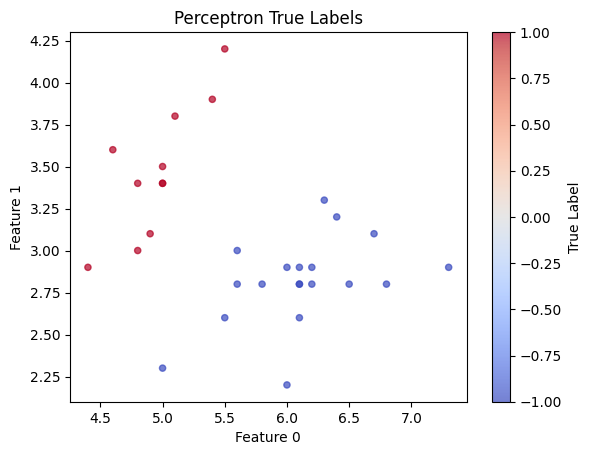

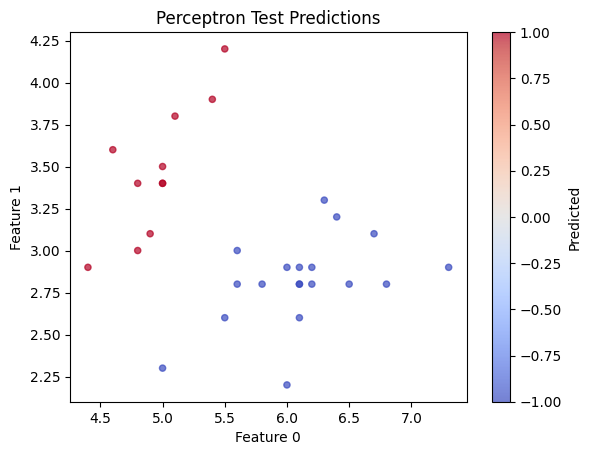

In [210]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)
X = df.drop(columns="species").values
y = df["species"].values
y_binary = np.where(y == 0.0, 1, -1)  # 1 = setosa, -1 = not setosa

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=0)

# Train your Perceptron
model = Perceptron(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

# Predict on test set
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")